<a href="https://colab.research.google.com/github/shaikhnhl/EDA_Airbnb_Bookings_Analysis/blob/main/EDA_Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: EDA - Airbnb Booking Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** - Prathamita Naphade
##### **Team Member 2 -** - Nihal Shaikh


# **Project Summary**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Explore and analyse the data to discover key understandings.

# **GitHub Link**

# **Problem Statement**



#### **Define Your Business Objective**

To investigate the following:
1. Are the listings equally distributed across the boroughs?
2. Which room types are preferred over others?
3. Which hosts have listed the most properties?
4. Where can we find the most reviewed/popular listings?
5. Are there any significant variations in prices based on the location of properties? If so, which areas are relatively expensive or cheap than others?

# **Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [23]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [24]:
# Loading the data
dataset = pd.read_csv('https://drive.google.com/uc?id=1Wvn50HXu7t914tBLX9NlmGY30bMe5A2X')

### Dataset First View

In [25]:
# Viewing the first few rows of the dataset
dataset.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### Total Rows and Columns

In [26]:
# Checking the count of rows and columns
print(f"Shape of the dataset: {dataset.shape}")

Shape of the dataset: (48895, 16)


### Dataset Information

In [27]:
# Overall info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Variables Description

* **id:** Unique id of the listing
* **name:** Name of the listing
* **host_id:** Unique id of the host
* **host_name:** Name of the host
* **neighbourhood_group:** Borough in which the property is situated
* **neighbourhood:** Area in which the property is situated
* **latitude:** Latitude coordinates
* **longitude:** Longitude coordinates
* **room_type:** Type of listing
* **price:** Price of listing in dollars
* **minimum_nights:** Minimum nights to be paid for
* **number_of_reviews:** Total number of reviews given
* **last_review:** Date of the latest review given
* **reviews_per_month:** Number of reviews given per month
* **calculated_host_listings_count:** Count of listings per host
* **availability_365:** Availability for booking around the year

#### Duplicate rows

In [28]:
# Checking for the count of duplicate rows
duplicates = dataset[dataset.duplicated()]
print(f"Count of duplicate rows: {len(duplicates)}")

Count of duplicate rows: 0


#### Missing/Null Values

In [29]:
# Checking for missing values in each column
print("Count of missing values:")
print(dataset.isnull().sum())

Count of missing values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### What do you know about your dataset?

The provided dataset is from Airbnb consisting of all the properties listed for renting by various hosts across the New York City. Our goal is to explore, analyse and pull out some meaningful insights from the same.

This dataset has 48895 rows and 16 columns with a mix between numeric and categorical values. It has no duplicates, however, there are a couple of missing values in some columns.

## ***2. Data Cleaning***

### Dataset Copy

In [30]:
# Creating a copy of the original dataset
df = dataset.copy()

### Remove Unnecessary Columns

We start off by dropping some columns that won't add value in our analysis, which in this case are the name, host_name and last_review columns.

In [31]:
# Dropping irrelevant columns
df = df.drop(['name','host_name','last_review'], axis=1)

### Handling Missing Values

We earlier saw that there were some missing values in the columns name, host_name, last_review and reviews_per_month. Since we have dropped the first three columns out of the four, we are only left with the reviews_per_month column.

In [32]:
# Filtering the rows where 'reviews_per_month' column has null values
df[df['reviews_per_month'].isna()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
19,7750,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
26,8700,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
36,11452,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
38,11943,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


As observed above, the 'reviews_per_month' column has null values wherever the 'number_of_reviews' column is 0.

Hence, it would make sense to fill these null values with 0 since if a listing has received no number of reviews then naturally its reviews per month will also be 0.

In [33]:
# Replacing the null values by 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Checking again for missing values
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Thus, we have successfully handled all the missing values in the dataset.

### Streamline Datatypes

Since, the columns 'id' and 'host_id' represent categorical information about the listings and hosts, thus, we will convert their datatypes to string.

In [34]:
# Converting the data types
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)

# Checking the overall info again to verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   host_id                         48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

## ***3. Data Visualization***

### Chart 1 - Pie Chart on Neighbourhood Group (Univariate)

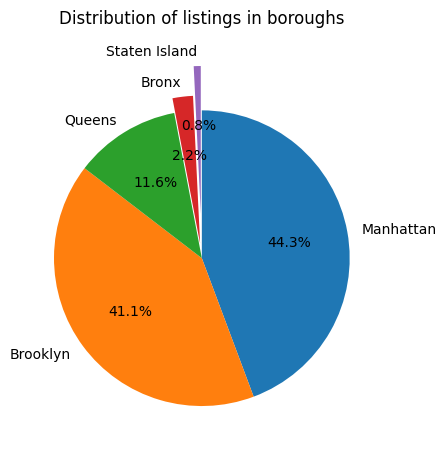

In [53]:
# Distribution of listings in terms of neighbourhood group
grouped = df['neighbourhood_group'].value_counts()
plt.pie(x = grouped.values, labels = grouped.index, autopct="%.1f%%", counterclock=False, startangle = 90, explode = [0,0,0,0.1,0.3])
plt.title("Distribution of listings in boroughs\n\n")
plt.show()

#### 1. Why did you pick the specific chart?

A pie chart helps us to visualize and compare fractions of data falling under different categories. Thus, we used this pie chart here to understand the percentage of listings across the various neighbourhood groups.

#### 2. What is/are the insight(s) found from the chart?

From the above chart, we can observe that more than 85% of Airbnb listings in NYC lie in either Manhattan or Brooklyn, with Manhattan covering the highest percentage.
On the other hand, Staten Island has less than 1% of listings which is almost negligible.

### Chart 2 - Bar Chart of Neighbourhood Group and Room Type (Univariate)

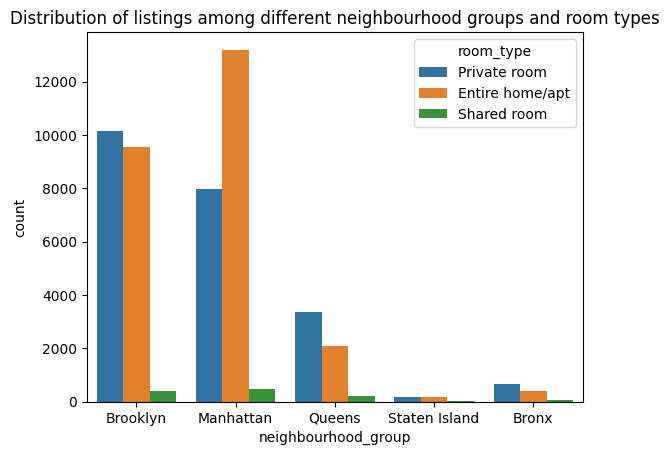

In [36]:
# Distribution of listings among different neighbourhood groups and room types
sns.countplot(x = df['neighbourhood_group'], hue = df['room_type'])
plt.title("Distribution of listings among different neighbourhood groups and room types")
plt.show()

#### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical variable.
Hence, we used this bar chart to represent the distribution of the types of rooms among the various neighbourhood groups.

#### 2. What is/are the insight(s) found from the chart?

We can observe that except Manhattan, all the other neighbourhood groups have more private rooms than any other room type with Brooklyn having the most.

While Manhattan alone, has half of the total entire homes/apartments present in NYC.

Also, the number of shared rooms is very less among all the neighbourhood groups.

### Chart 3 - Top Ten Hosts(Univariate)

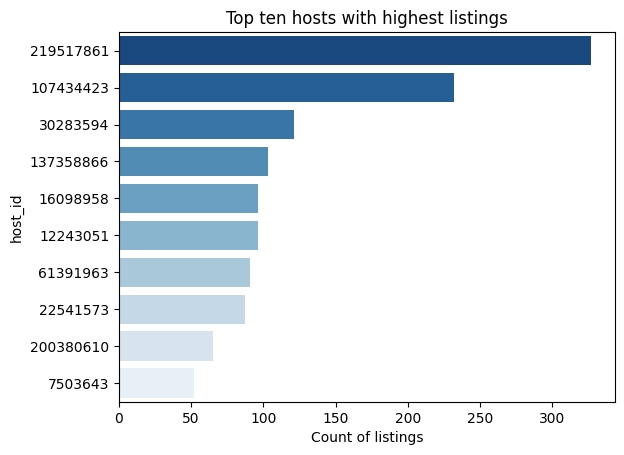

In [37]:
# Top 10 hosts with the highest number of listings
top_ten_hosts = df['host_id'].value_counts().head(10)
sns.barplot(y = top_ten_hosts.index, x = top_ten_hosts.values, palette = "Blues_r")
plt.title("Top ten hosts with highest listings")
plt.xlabel("Count of listings")
plt.ylabel("host_id")
plt.show()

#### 1. Why did you pick the specific chart?

Horizontal bar charts are quite useful when we need to visualize the top categories with respect to a specific measure.
This horizontal bar chart gives us the top ten hosts with the highest number of listings under their name.

#### 2. What is/are the insight(s) found from the chart?

We can observe that only those hosts which have listed more than 50 properties are falling under the top ten bracket.
The highest count of listings i.e. 327 belongs to the host with id *21957861*.

### Chart 4 - Top Ten Reviewed Listings (Bivariate)

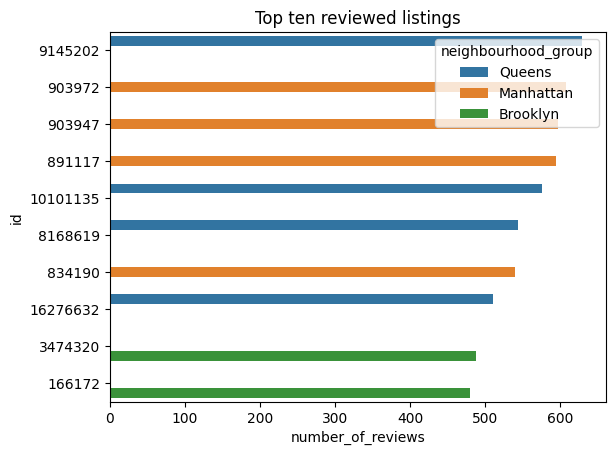

In [38]:
# Most reviewed/popular listings
top_ten_listings = df[['id','neighbourhood_group','number_of_reviews']].sort_values(by = 'number_of_reviews', ascending = False, ignore_index = True).head(10)
sns.barplot(x=top_ten_listings['number_of_reviews'], y=top_ten_listings['id'], hue= top_ten_listings['neighbourhood_group'])
plt.title("Top ten reviewed listings")
plt.show()


#### 1. Why did you pick the specific chart?

Horizontal bar charts are quite useful when we need to visualize the top  categories with respect to a specific measure.
This horizontal bar chart gives us the top ten listings with the highest number of reviews which signifies popularity.

#### 2. What is/are the insight(s) found from the chart?

We can observe that the 10 most popular properties are in Queens, Manhattan and Brooklyn, out of which 8 belongs to Queens and Manhattan.

### Chart 5 - Location of Listings (Bivariate)

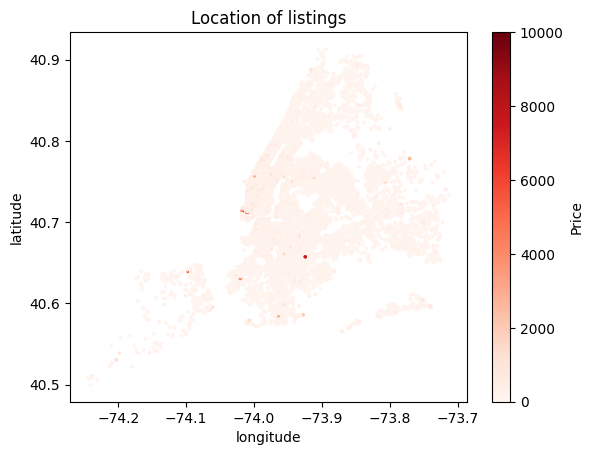

In [57]:
# Scatter plot for location of listings
plt.scatter(x = df['longitude'], y = df['latitude'], c = df['price'], s = 3, cmap = "Reds")
plt.title("Location of listings")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar().set_label("Price")
plt.show()

As observed in the above plot, it seems that the prices of some listings are extremely high, due to which we are not getting that much insights.
Hence, we will proceed with checking the overall statistics of the price column.

In [40]:
# Investigating the stats of the price column
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Since, the max value is quite large as compared to the mean and 75th percentile of the data, this proves that the price column has outliers on the upper side that needs treatment.

For this, we will proceed with the IQR method.

In [41]:
# Outlier treatment by IQR method

# First quartile of the column
Q1 = df['price'].quantile(0.25)

# Third quartile of the column
Q3 = df['price'].quantile(0.75)

# Inter Quartile Range
IQR = Q3 - Q1

# Upper Limit
UL = Q3 + 1.5 * IQR

# Filtering the dataset so that the prices fall under the upper limit
treated_df = df[df['price'] <= UL]

Post outlier treatment, let's try creating the same plot again and check the results.

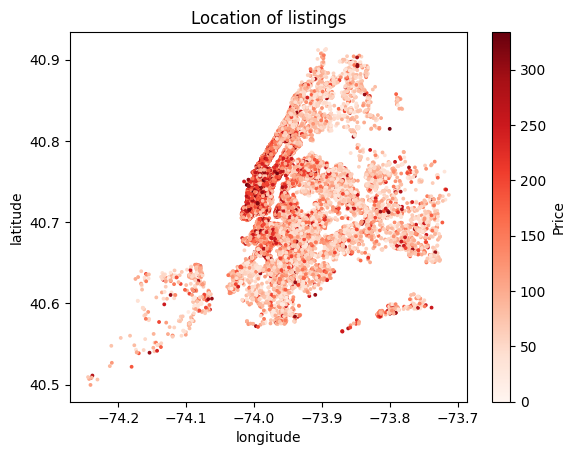

In [58]:
# Recreating the scatter plot
plt.scatter(x = treated_df['longitude'], y = treated_df['latitude'], c = treated_df['price'], s = 3, cmap = "Reds")
plt.title("Location of listings")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar().set_label("Price")
plt.show()

#### 1. Why did you pick the specific chart?

Since we had the latitude and longitude co-ordinates for every listing, the scatter plot showcases the exact location of all the listings across NYC through individual points alongwith their prices as an indicator.

#### 2. What is/are the insight(s) found from the chart?

Post outlier treatment, we can observe that majority of expensive listings are in Manhattan.
Besides that Brooklyn seems to have some expensive listings as well.

### Chart 6 - Price Variation (Bivariate)

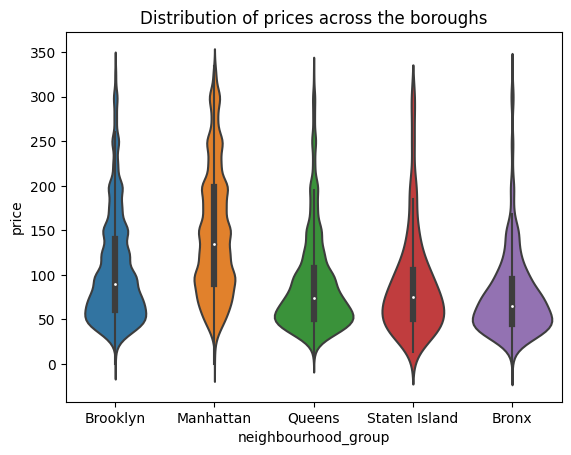

In [43]:
# Distribution of prices across the neighbourhood groups
sns.violinplot(x=treated_df['neighbourhood_group'], y=treated_df['price'])
plt.title("Distribution of prices across the boroughs")
plt.show()

#### 1. Why did you pick the specific chart?

A violin plot makes it quite easy for us to visualize the frequency distribution of a variable. With this violin plot, we can clearly observe and compare the distribution of prices for listings among the various neighbourhood groups.

#### 2. What is/are the insight(s) found from the chart?

We can observe that Manhattan has the widest range of prices i.e. there are as many expensive listings as there are cheap ones, with an average price of 140. This is followed by Brooklyn with an average of around 90.

Queens and Staten Island show almost similar price distribution, whereas Bronx have much cheaper listings than others.

# **Conclusion**



*   Manhattan and Brooklyn are the most travelled destinations by tourists across NYC due to the fact that they have the highest number of listings available, while Staten Island has the least.
*   The most preferred room types are entire homes/apartments and private rooms.
*   In general, private rooms are preferred over entire homes/apartments with the exception of Manhattan, wherein entire homes/apartments are more preferrable.
*   The maximum number of properties listed by a single host is above 300.
*   Although having relatively less number of total listings, Queens has more top reviewed/popular listings than Brooklyn.
*   With the highest average price of listings, Manhattan comes out to be the most expensive place in NYC.
*   Bronx is the cheapest option to stay among all others.


